In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mp
data=pd.read_csv("credit.csv.zip")


#grabbing a peek at the data
data.head()

,AcountNumber,CVV,CustomerAge,Gender,Marital Status,CardColour,CardType,Domain,Amount,AverageIncomeExpendicture,Outcome,Customer_City_Address
0,1275734409,364,28.0,Male,Married,Gold,Verve,Local,129282,170919,0,Enugu
1,1271246193,401,25.0,Male,Single,Gold,Verve,International,574384,329353,1,Enugu
2,1242290165,266,21.0,Female,Married,White,Visa,International,190766,292922,0,Enugu
3,1245478185,402,26.0,Male,Unknown,White,Visa,Local,130395,145444,0,Ibadan
4,1258212072,334,28.0,Female,Married,Gold,Verve,International,685145,295990,1,Port Harcourt


In [2]:
# checking for missing values in dataset
data.isnull().sum()
# checking for duplicate values
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
37092    False
37093    False
37094    False
37095    False
37096    False
Length: 37097, dtype: bool

In [3]:
# dropping customer age column from dataset
data1= data.drop(['CustomerAge'], axis=1)
#obtaining features and shape of data
print(data1.shape)
print(data1.describe())

(37097, 11)
       AcountNumber           CVV         Amount  AverageIncomeExpendicture  \
count  3.709700e+04  37097.000000   37097.000000               37097.000000   
mean   1.264835e+09    443.595897  550260.997736              227386.956492   
std    1.478694e+07    135.223267  260629.814049               78977.053916   
min    1.239297e+09    211.000000  100003.000000              100017.000000   
25%    1.251999e+09    327.000000  324480.000000              161178.000000   
50%    1.264885e+09    443.000000  550293.000000              222530.000000   
75%    1.277613e+09    561.000000  775075.000000              283447.000000   
max    1.290470e+09    678.000000  999956.000000              399971.000000   

            Outcome  
count  37097.000000  
mean       0.737796  
std        0.439839  
min        0.000000  
25%        0.000000  
50%        1.000000  
75%        1.000000  
max        1.000000  


In [4]:
# converting string data to numeric data
from sklearn.preprocessing import OrdinalEncoder
data1['Gender'].unique()
enc= OrdinalEncoder()
enc.fit_transform(data1[['Gender']])
data1['Marital Status'].unique()
enc.fit_transform(data1[['Marital Status']])
data1['CardColour'].unique()
enc.fit_transform(data1[['CardColour']])
data1['CardType'].unique()
enc.fit_transform(data1[['CardType']])
data1['Domain'].unique
enc.fit_transform(data1[['Domain']])
data1['Customer_City_Address'].unique()
enc.fit_transform(data1[['Customer_City_Address']])
data1[['Gender']]=enc.fit_transform(data1[['Gender']])
data1[['Marital Status']]=enc.fit_transform(data1[['Marital Status']])
data1[['CardColour']]=enc.fit_transform(data1[['CardColour']])
data1[['CardType']]=enc.fit_transform(data1[['CardType']])
data1[['Domain']]=enc.fit_transform(data1[['Domain']])
data1[['Customer_City_Address']]=enc.fit_transform(data1[['Customer_City_Address']])
data1.head()

,AcountNumber,CVV,Gender,Marital Status,CardColour,CardType,Domain,Amount,AverageIncomeExpendicture,Outcome,Customer_City_Address
0,1275734409,364,1.0,1.0,0.0,1.0,1.0,129282,170919,0,1.0
1,1271246193,401,1.0,2.0,0.0,1.0,0.0,574384,329353,1,1.0
2,1242290165,266,0.0,1.0,1.0,2.0,0.0,190766,292922,0,1.0
3,1245478185,402,1.0,3.0,1.0,2.0,1.0,130395,145444,0,2.0
4,1258212072,334,0.0,1.0,0.0,1.0,0.0,685145,295990,1,7.0


In [5]:
# Determining number of fraud cases
fraud=data1[data1["Outcome"]==1]
valid=data1[data1["Outcome"]==0]
outlierfraction=len(fraud)/float(len(valid))
print(outlierfraction)
print('fraud cases:',len(fraud))
print("valid cases:",len(valid))

2.8138172098283127
fraud cases: 27370
valid cases: 9727


In [6]:
#printing amount details for fraud transanctions
fraud.Amount.describe()

count     27370.000000
mean     647113.580234
std      224363.794334
min      150070.000000
25%      484608.250000
50%      669625.000000
75%      835785.750000
max      999956.000000
Name: Amount, dtype: float64

In [7]:
#printing amount details for valid transanctions
valid.Amount.describe()

count      9727.000000
mean     277735.534286
std      129439.270516
min      100003.000000
25%      160572.000000
50%      256232.000000
75%      384818.500000
max      599320.000000
Name: Amount, dtype: float64

In [8]:
# dividing data into x and y to obtain input and output data
X=data1.drop(['Outcome'], axis = 1)
Y=data1['Outcome']
# dimension of X
print(X.shape)
# dimension of Y
print(Y.shape)


(37097, 10)
(37097,)


In [9]:
# getting values for processing
xData = X.values
yData= Y.values

In [10]:
from sklearn.model_selection import train_test_split
# splitting data into training and testing data set
xTrain,xTest,yTrain,yTest= train_test_split(xData,yData,test_size=0.4, random_state=42)

In [11]:
# Balancing the data
print("Before undersampling,counts of label '1' :{}".format(sum(yTrain ==1)))
print("Before undersampling,counts of label '0' :{} \n".format(sum(yTrain ==0)))
from imblearn.under_sampling import NearMiss
nr=NearMiss()
xTrain,yTrain=nr.fit_resample(xTrain,yTrain.ravel())
print("After undersampling,counts of label '1' :{}".format(sum(yTrain ==1)))
print("After undersampling,counts of label '0' :{}".format(sum(yTrain ==0)))

Before undersampling,counts of label '1' :16489
Before undersampling,counts of label '0' :5769 

After undersampling,counts of label '1' :5769
After undersampling,counts of label '0' :5769


In [12]:
from sklearn import tree
# creating Decision Tree classifier
dtc=tree.DecisionTreeClassifier()
dtc.fit(xTrain,yTrain)
ypred=dtc.predict(xTest)

In [13]:
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import f1_score,matthews_corrcoef
from sklearn.metrics import classification_report,accuracy_score
def evaluation_scores():
    acc=accuracy_score(yTest,ypred)
    print("the accuracy is",acc)
    prec=precision_score(yTest,ypred)
    print("the precision score is",prec)
    rec=recall_score(yTest,ypred)
    print("the recall is",rec)
    f1=f1_score(yTest,ypred)
    print("the f1 score is",f1)
    mcc=matthews_corrcoef(yTest,ypred)
    print("the matthews correlation is",mcc)
evaluation_scores()    

the accuracy is 0.853426780780376
the precision score is 0.8976068688344904
the recall is 0.9031339031339032
the f1 score is 0.9003619038893217
the matthews correlation is 0.6233083852494177


In [14]:
from sklearn.linear_model import LogisticRegression
# creating logistic regression model
lg=LogisticRegression()
lg.fit(xTrain,yTrain)
ypred=lg.predict(xTest)
evaluation_scores()

the accuracy is 0.8208774176157423
the precision score is 0.8797450817400942
the recall is 0.8753791011855528
the f1 score is 0.8775566611387509
the matthews correlation is 0.5440870600089462


In [15]:
from sklearn.ensemble import RandomForestClassifier
# creating Random Forest model
rfc= RandomForestClassifier()
rfc.fit(xTrain,yTrain)
ypred=rfc.predict(xTest)
evaluation_scores()

the accuracy is 0.852752880921895
the precision score is 0.9155993117950678
the recall is 0.8803418803418803
the f1 score is 0.8976245138921426
the matthews correlation is 0.6373923891867617


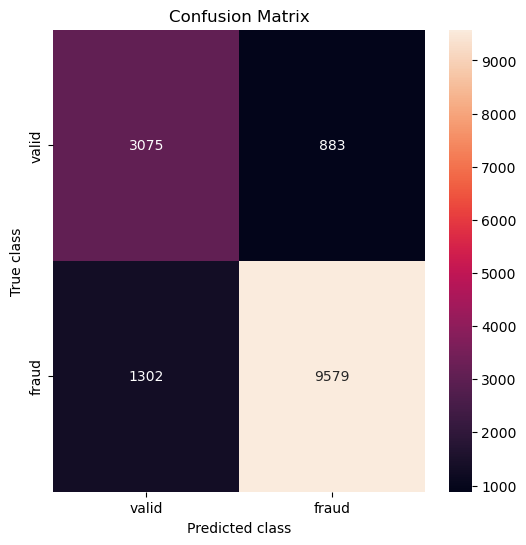

In [19]:
# creating confusion matrix
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
LABELS=['valid','fraud']
conf_matrix=confusion_matrix(yTest,ypred)
plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix,xticklabels=LABELS,yticklabels=LABELS,annot=True,fmt='d')
plt.title("Confusion Matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [17]:
from sklearn.model_selection import KFold
kfold_validation=KFold(5)
from sklearn.model_selection import cross_val_score
result=cross_val_score(rfc,xData,yData,cv=kfold_validation)
print(result)
print("the average accuracy by k-fold cross validation is",np.mean(result))

[0.86253369 0.85592992 0.85901065 0.86386305 0.85523655]
the average accuracy by k-fold cross validation is 0.8593147738613867


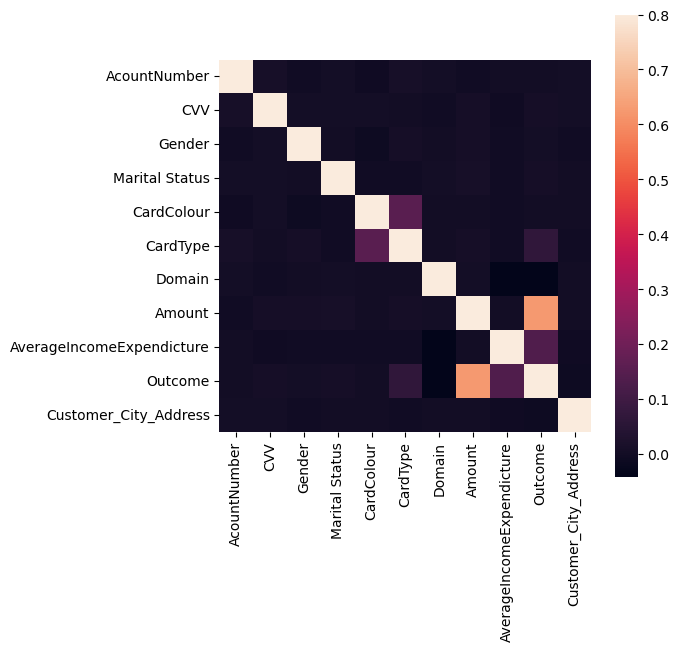

In [23]:
# creating correlation matrix
corrmat=data1.corr()
fig=plt.figure(figsize=(6,6))
sns.heatmap(corrmat,vmax=.8,square=True)
plt.show()